In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Wczytanie Danych

## Zbiór wine.csv

Przy pomocy biblioteki pandas, wczytany zostanie zbiór wine.csv. 

In [2]:
wine = pd.read_csv("./datasets/wine.csv")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Po wypisaniu informacji na temat zbioru wine.csv zauważamy, że zbiór ma wyłącznie zmienne liczbowe i nie posiada wartości pustych.

In [3]:
wine.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


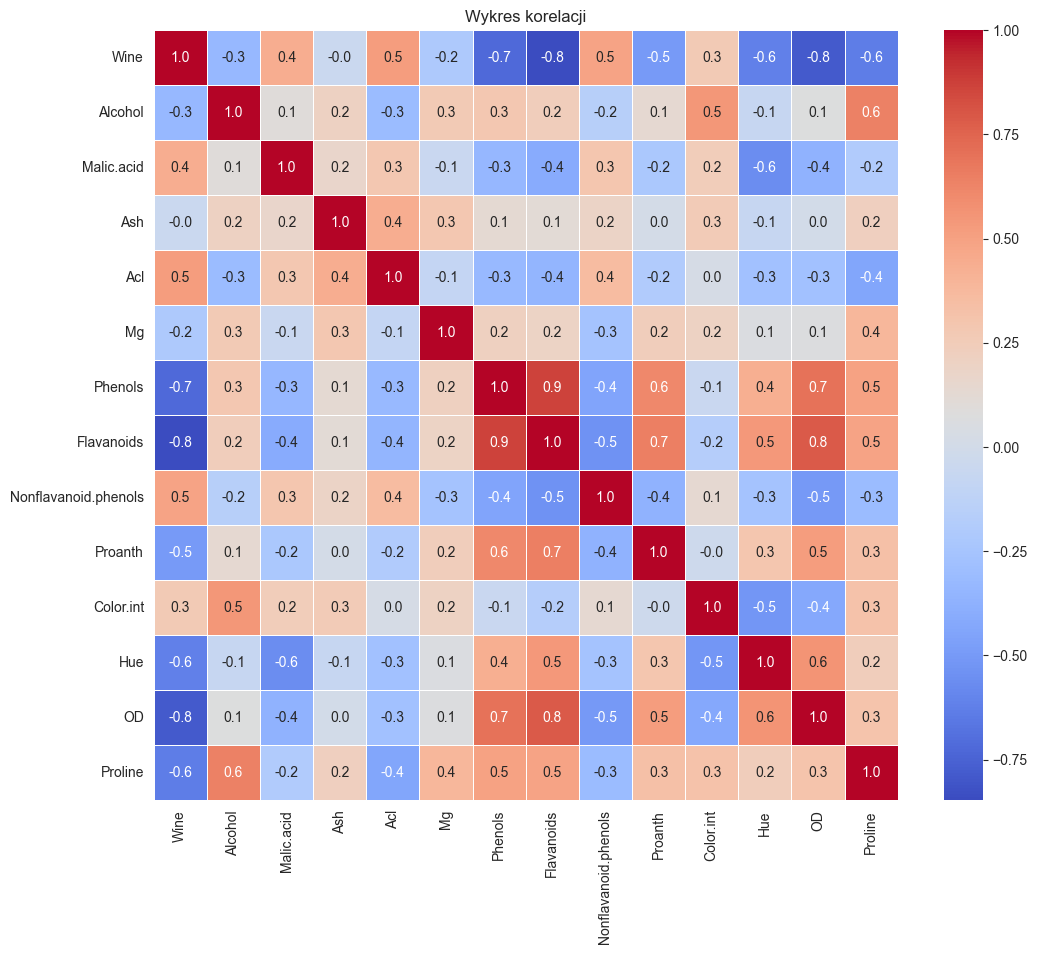

In [4]:
plt.figure(figsize=(12,10))
corr_matrix = wine.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title("Wykres korelacji")
plt.show()

Powyżej widać wykres korelacji zmiennych. Będziemy badać model zależności kolumny Wine od pozostałych zmiennych. Widać silną korelację zmiennej 'Wine' ze zmiennymi 'Phenois', 'Flavanoids' oraz 'OD'.

# 2. Selekcja zmiennych

## Ręczna selekcja zmiennych.

Ręczna selekcja polega na tworzeniu kolejnych modeli m, każdorazowo z mniejszą liczbą zmiennych. Zmienne są usuwane na podstawie wartości P-value, widoczną po wykonaniu metody m.summary(), aż do momentu gdy P-value każdej zmiennej jest mniejsze 0.1.

In [5]:
m1 = sm.OLS(wine['Wine'], sm.add_constant(wine.drop('Wine', axis=1))).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wine   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           7.57e-75
Time:                        19:04:34   Log-Likelihood:                -1.6977
No. Observations:                 178   AIC:                             31.40
Df Residuals:                     164   BIC:                             75.94
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4733 

Powyżej stworzyliśmy model względem zmiennej 'Wine'. R-squared = 0.900, Adj. R-squared = 0.892.

In [6]:
m2 = sm.OLS(wine['Wine'], sm.add_constant(wine.drop(['Wine','Mg'], axis=1))).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wine   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     123.8
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           6.97e-76
Time:                        19:04:34   Log-Likelihood:                -1.7488
No. Observations:                 178   AIC:                             29.50
Df Residuals:                     165   BIC:                             70.86
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4389 

Z modelu została usunięta zmienna 'Mg' z P-value = 0.759. R-squared = 0.900, Adj. R-squared = 0.893.

In [7]:
m3 = sm.OLS(wine['Wine'], sm.add_constant(wine.drop(['Wine','Mg', 'Proanth'], axis=1))).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wine   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           8.00e-77
Time:                        19:04:34   Log-Likelihood:                -2.0897
No. Observations:                 178   AIC:                             28.18
Df Residuals:                     166   BIC:                             66.36
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.5006 

Z modelu została usunięta zmienna 'Proanth' z P-value = 0.427. R-squared = 0.900, Adj. R-squared = 0.893.

In [8]:
m4 = sm.OLS(wine['Wine'], sm.add_constant(wine.drop(['Wine','Mg', 'Proanth', 'Hue'], axis=1))).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wine   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     148.4
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.20e-77
Time:                        19:04:34   Log-Likelihood:                -2.7720
No. Observations:                 178   AIC:                             27.54
Df Residuals:                     167   BIC:                             62.54
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3746 

Z modelu została usunięta zmienna 'Hue' z P-value = 0.260. R-squared = 0.899, Adj. R-squared = 0.893.

In [9]:
m5 = sm.OLS(wine['Wine'], sm.add_constant(wine.drop(['Wine','Mg', 'Proanth', 'Hue', 'Nonflavanoid.phenols'], axis=1))).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wine   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           3.50e-78
Time:                        19:04:34   Log-Likelihood:                -4.2093
No. Observations:                 178   AIC:                             28.42
Df Residuals:                     168   BIC:                             60.24
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2635      0.461      9.242      0.0

Z modelu została usunięta zmienna 'Nonflavanoid.phenols' z P-value = 0.101. R-squared = 0.897, Adj. R-squared = 0.892.

Była to ostatnia zmienna którą usuwaliśmy z modelu, ponieważ w aktualnym modelnu P-value każdej zmiennej jest mniejsze niż 0.1

Finalnie nowy model ma 9 zmiennych (pierwotny miał 13). Teraz porównamy wartości R-squared, Adj. R-squared oraz wykonamy f-test.

In [10]:
print("R-squared dla modelu m1: ", m1.rsquared)
print("R-squared adjusted dla modelu m1: ", m1.rsquared_adj)
print("R-squared dla modelu m5: ", m5.rsquared)
print("R-squared adjusted dla modelu m5: ", m5.rsquared_adj)

R-squared dla modelu m1:  0.9000888589448974
R-squared adjusted dla modelu m1:  0.8921690733734564
R-squared dla modelu m5:  0.8972290939475048
R-squared adjusted dla modelu m5:  0.8917235096946926


Patrząc na powyższe wartości, trudno stwierdzić duże różnice między nimi, daje to nadzieję na to, że udało stowrzyć się model niegorszy niz pierwotny, należy to jednak zweryfikować.

Do f-testu mamy dwie hipotezy:

H0: modele są podobne

H1: istnieje istotna różnica pomiędzy modelami

In [11]:
f,p_value,_ = m1.compare_f_test(m5)
print(p_value)

0.3244111597560254


Jeżeli p-value < 0.05 wtedy odrzucamy h0. W naszym przypadku p-value jest większe. Z tego względu nie możemy odrzucić h0, czyli model mniejszy przewiduje podobnie dobrze jak model większy, ale ma mniej zmiennych, czyli powinien liczyć szybciej.

Do porównania p-value obu modeli użyliśmy testu-f, który działa na takiej samej zasadzie jak test ANOVA (w tym przypadku). (https://en.wikipedia.org/wiki/F-test)

Ogólny wniosek jest taki że udało się zbudować model niegorszy niż pierwotny, mający mniej zmiennych (nieznacznie), zatem prawdopodobnie szybszy niż pierwotny. W przypadku tego modelu, jego tworzenie było szybkie, ponieważ usunęliśmy tylko 4 zmienne.

## Zachłanna minimalizacja w przód i w tył

In [12]:
X = wine.drop('Wine', axis=1)
y = wine['Wine']
model = linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model,
                                k_features='best',
                                forward=True,
                                scoring='neg_mean_squared_error',
                                cv=15)
sfs.fit(X, y)
selected_features = list(X.columns[list(sfs.k_feature_idx_)])

X_selected = sm.add_constant(X[selected_features])
model = sm.OLS(y, X_selected)
wprzod = model.fit()

print(wprzod.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wine   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           3.50e-78
Time:                        19:04:35   Log-Likelihood:                -4.2093
No. Observations:                 178   AIC:                             28.42
Df Residuals:                     168   BIC:                             60.24
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2635      0.461      9.242      0.0

In [13]:
X = wine.drop('Wine', axis=1)
y = wine['Wine']
model = linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model,
                                k_features='best',
                                forward=False,
                                scoring='neg_mean_squared_error',
                                cv=15)
sfs.fit(X, y)
selected_features = list(X.columns[list(sfs.k_feature_idx_)])

X_selected = sm.add_constant(X[selected_features])
model = sm.OLS(y, X_selected)
wtyl = model.fit()

print(wtyl.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wine   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           3.50e-78
Time:                        19:04:36   Log-Likelihood:                -4.2093
No. Observations:                 178   AIC:                             28.42
Df Residuals:                     168   BIC:                             60.24
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2635      0.461      9.242      0.0

In [14]:
f,p_value,_ = m1.compare_f_test(wprzod)
print(p_value)

0.3244111597560254


In [15]:
f,p_value,_ = m1.compare_f_test(wtyl)
print(p_value)

0.3244111597560254


Zachłanna minimalizacja w przód oraz w tył została wykonana przy użyciu funkcji SequentialFeatureSelector. Pozwala ona na dostosowanie takich parametrów jak - wybór modelu liniowego (w naszym przypadku modelu regresji liniowej), kierunku przetwarzania (w przód/tył), ilości porządanych zmiennych (wartość można określić, lecz my wybraliśmy opcję 'best'), oceny predykatów o najmniejszym MSE, oraz walidacji krzyżowej, która określa strategię dzielenia (na ile części zostanie podzielony zbiór treningowy)
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html
https://machinelearningmastery.com/k-fold-cross-validation/

Porównując otrzymane wyniki zachłannej minimalizacji w przód oraz w tył z wcześniej stworzonym modelem m1 dostaliśmy w obu przypadkach takie samo P-value = 0.3244.

Zatem w obu pprzypadkach nie mamy podstaw do odrzucenia hipotezy H0, zatem możemy przyjąć, że oba stworzone modele są niegorsze niż model pierwotny.

Co ciekawe, w tym zbiorze danych, zachłanna minimalizacja w obie storny jak i ręczna selekcja zmiennch, dały dokładnie takie same modele, składające się z tych samych 9 zmiennych.

## PCA

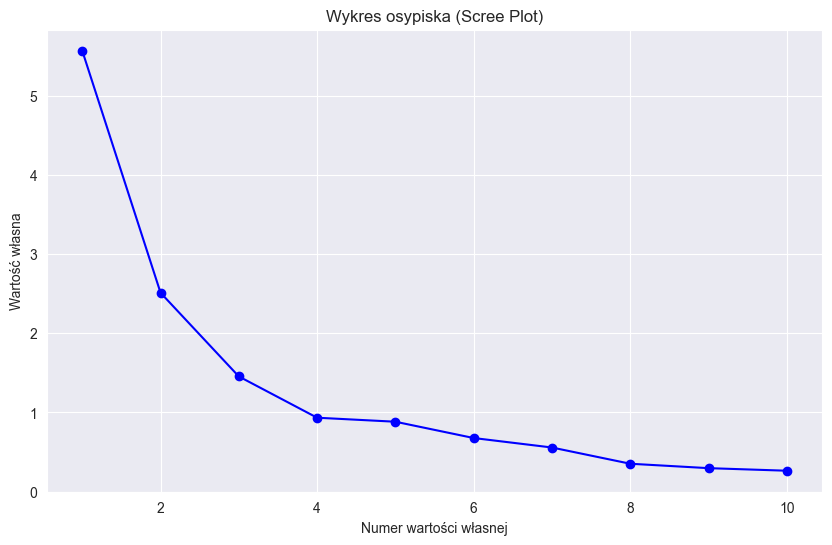

In [16]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine)

pca = PCA()
pca.fit(wine_scaled)

wariancja = pca.explained_variance_ratio_
calkowita_wariancja = wariancja.cumsum()

n_components = np.argmax(calkowita_wariancja >= 0.95) + 1 # wybor maksymalnej liczby nowych zmiennych
pca = PCA(n_components=n_components)

plt.figure(figsize=(10, 6))
X_pca = pca.fit_transform(wine_scaled)
X_pca_with_const = sm.add_constant(X_pca)

plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='-', color='b')
plt.title('Wykres osypiska (Scree Plot)')
plt.xlabel('Numer wartości własnej')
plt.ylabel('Wartość własna')
plt.show()

Po analizie wykresu osypiska widać, że PCA stworzyło za dużo zmiennych. Osypisko kończy się przy zmiennej 6. Poniżej tworzymy lepszy model z mniejszą ilością zmiennych.

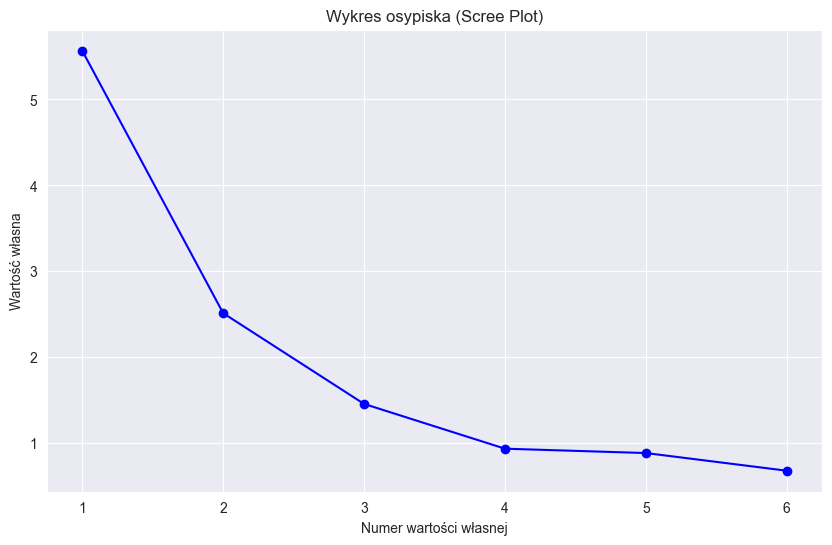

In [17]:
n_components = 6 # wybor maksymalnej liczby nowych zmiennych
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(wine_scaled)

X_pca_with_const1 = sm.add_constant(X_pca)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='-', color='b')
plt.title('Wykres osypiska (Scree Plot)')
plt.xlabel('Numer wartości własnej')
plt.ylabel('Wartość własna')
plt.show()

In [18]:
model = sm.OLS(wine['Wine'], X_pca_with_const1)
pca = model.fit()
print(pca.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wine   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     331.0
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.40e-91
Time:                        19:04:37   Log-Likelihood:                 18.899
No. Observations:                 178   AIC:                            -23.80
Df Residuals:                     171   BIC:                            -1.525
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9382      0.017    116.478      0.0

Końcowe R-squared naszego modelu to 0.924, a Adj R-squared to 0.921

In [19]:
f,p_value,_ = m1.compare_f_test(pca)
print(p_value)

1.0


Otrzymane P-value ozancza, że nie możemy odrzucić hipotezy H0, czyli nasz nowy model nie jest gorszy niż pierowtny, jednocześnie ma ponad 2 razy mniej zmiennych niż model pierwotny. Dodatkowo patrząc na wartość Adj. R-squared = 0.918 można przypuszczać, że jest to nawet model lepszy niż pierwotny. 

Ze względu na bardzo wysokie Adj. R-squared, próbowaliśmy zmniejszyć liczbę zmiennych do 4, jednak wtedy f-test dał nam bardzo niską P wartość, zmuszającą do odrzcuenia hipotezy H0.

# 3. Podsumowanie

Podsumowując, w przypadku tego zbioru danych, metoda PCA dała najkorzytsniejsze rezultaty. Utworzony model ma najmniej zmiennych, posiada wysoką wartość Adj. R-squared, a jego wytworzenie nie wymaga pisania dużo kodu i nie zajmuje czasu.